# Classification on the iris dataset

## Import Libraries

In [344]:
import torch
from torch.utils.data import Dataset
import numpy as np
import pandas as pd
%run utils.ipynb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tqdm

## Get the data

Get the metadata and the data itself:

In [345]:
iris_dataset = load_iris(return_X_y=False, as_frame=False)

Get and save number of examples of the data set:

In [346]:
m = iris_dataset.data.shape[0]
print("Number of samples is " + str(m))

Number of samples is 150


#### Save data and labels as DataFrames

In [347]:
X = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
y = pd.DataFrame(data=iris_dataset.target.reshape(m, -1), columns=["Class"]) # reshape to get the labels as (m, 1) and not (m,)

#### Split train-dev-test sets

In [348]:
random_seed = 42
X_train, X_dev_test, y_train, y_dev_test = train_test_split(X, y, test_size=0.4, random_state=random_seed)
X_dev, X_test, y_dev, y_test = train_test_split(X_dev_test, y_dev_test, test_size=0.5, random_state=random_seed)

View all sets sizes:

In [349]:
print("Input shape is:\t\t" + str(X.shape))
print("Output shape is:\t" + str(y.shape))
print("-------------------------------")
print("Train input shape is:\t" + str(X_train.shape))
print("Train output shape is:\t" + str(y_train.shape))
print("-------------------------------")
print("Dev input shape is:\t" + str(X_dev.shape))
print("Dev output shape is:\t" + str(y_dev.shape))
print("-------------------------------")
print("Test input shape is:\t" + str(X_test.shape))
print("Test output shape is:\t" + str(y_test.shape))

Input shape is:		(150, 4)
Output shape is:	(150, 1)
-------------------------------
Train input shape is:	(90, 4)
Train output shape is:	(90, 1)
-------------------------------
Dev input shape is:	(30, 4)
Dev output shape is:	(30, 1)
-------------------------------
Test input shape is:	(30, 4)
Test output shape is:	(30, 1)


## Explore the data

In [350]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [351]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
123,6.3,2.7,4.9,1.8
24,4.8,3.4,1.9,0.2
25,5.0,3.0,1.6,0.2
23,5.1,3.3,1.7,0.5
94,5.6,2.7,4.2,1.3


In [352]:
y_train.head()

,Class
123,2
24,0
25,0
23,0
94,1


In [353]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [354]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


In [355]:
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,90.000000,90.000000,90.000000,90.000000
mean,5.818889,3.005556,3.844444,1.243333
std,0.818040,0.411181,1.708545,0.749989
min,4.300000,2.200000,1.100000,0.100000
25%,5.100000,2.725000,1.625000,0.325000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.375000,3.200000,5.100000,1.800000
max,7.700000,4.200000,6.700000,2.500000


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

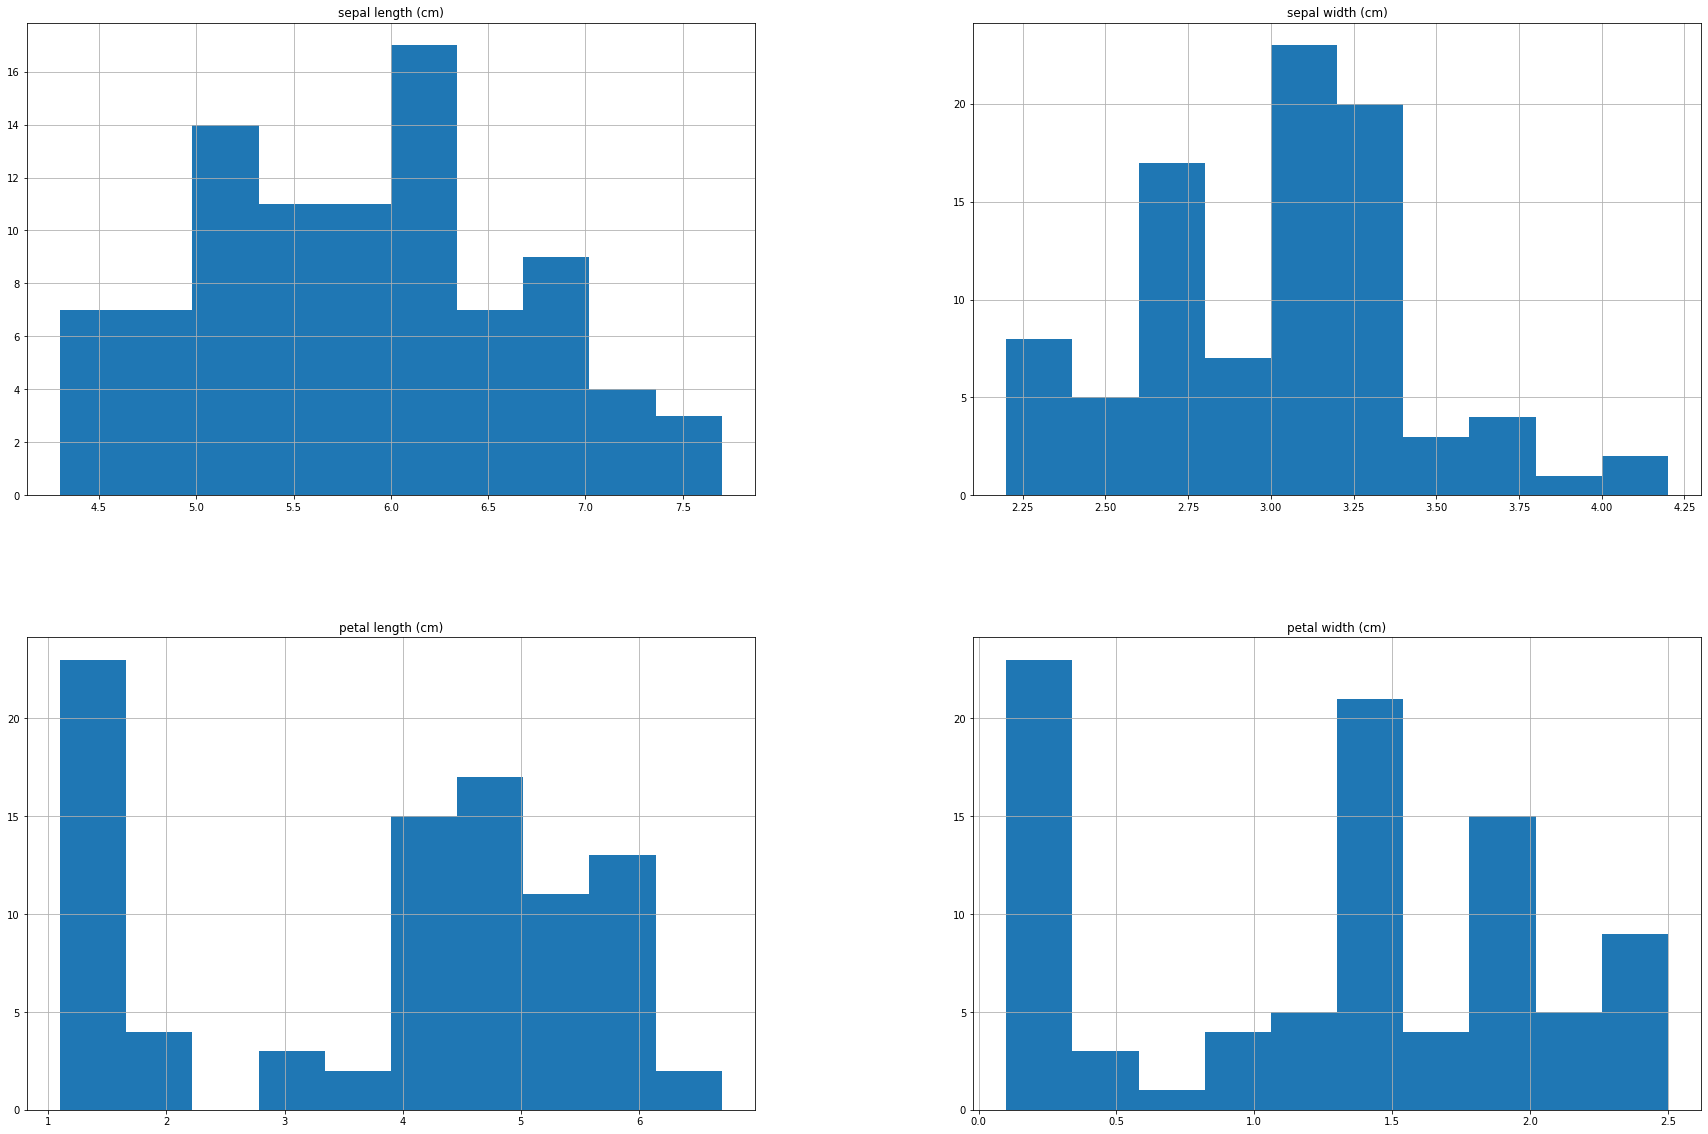

In [356]:
X_train.hist(figsize=(30, 20))

array([[<AxesSubplot:title={'center':'Class'}>]], dtype=object)

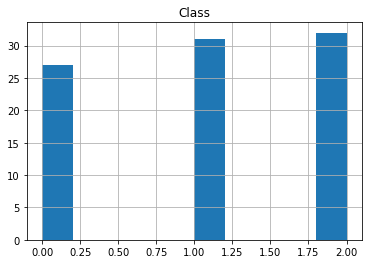

In [357]:
y_train.hist()

Check for correlation between parameters:

In [358]:
X_train.corr().style.applymap(color_corr_matrix)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.034054,0.860946,0.789994
sepal width (cm),-0.034054,1.000000,-0.341662,-0.279155
petal length (cm),0.860946,-0.341662,1.000000,0.958200
petal width (cm),0.789994,-0.279155,0.958200,1.000000


Print the scatter matrices:

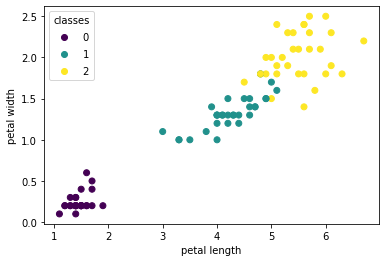

In [359]:
plot_scatter_iris(X_train["petal length (cm)"], X_train["petal width (cm)"], y_train["Class"], "petal length", "petal width")

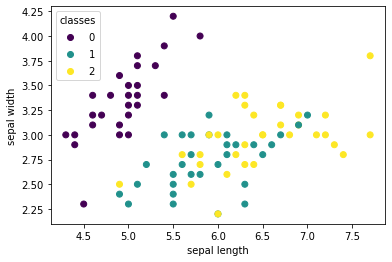

In [360]:
plot_scatter_iris(X_train["sepal length (cm)"], X_train["sepal width (cm)"], y_train["Class"], "sepal length", "sepal width")

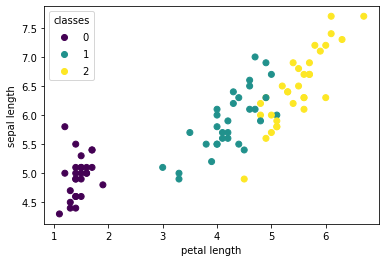

In [361]:
plot_scatter_iris(X_train["petal length (cm)"], X_train["sepal length (cm)"], y_train["Class"], "petal length", "sepal length")

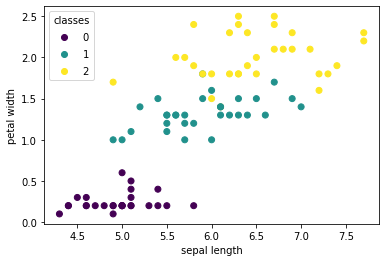

In [362]:
plot_scatter_iris(X_train["sepal length (cm)"], X_train["petal width (cm)"], y_train["Class"], "sepal length", "petal width")

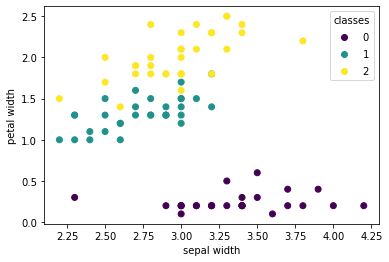

In [363]:
plot_scatter_iris(X_train["sepal width (cm)"], X_train["petal width (cm)"], y_train["Class"], "sepal width", "petal width")

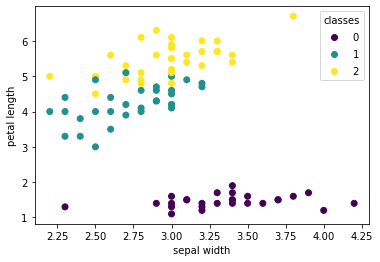

In [364]:
plot_scatter_iris(X_train["sepal width (cm)"], X_train["petal length (cm)"], y_train["Class"], "sepal width", "petal length")

## Prepare the data

#### Create pytorch Data class:

In [384]:
class IrisData(Dataset):
    def __init__(self, X, y):
        
        super(IrisData, self).__init__()
        
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        
        # Turn X to a tensor
        self.X = torch.as_tensor(X.values, dtype=torch.float, device=self.device)
        
        # Turn y to one-hot encoding and to a tensor
        # one_hot_encoder = OneHotEncoder(sparse=False)
        # y_1hot = one_hot_encoder.fit_transform(y)
        self.y = torch.as_tensor(y.values, dtype=torch.long, device=self.device).flatten()
        
        self.m = self.X.shape[0]
        
    def __len__(self):
        return self.m
    
    def __getitem__(self, index):
        return (self.X[index], self.y[index])
    
    def set_input(self, new_input):
        self.X = torch.as_tensor(new_input, dtype=torch.float, device=self.device)

Save the data as tensors:

In [385]:
train_dataset_torch = IrisData(X_train, y_train)
dev_dataset_torch = IrisData(X_dev, y_dev)
test_dataset_torch = IrisData(X_test, y_test)

#### Check similarity between pandas DF and the tensors

First 5 elements in the X, y train tensors:

In [392]:
train_dataset_torch[0:5]

(tensor([[ 0.5914, -0.7473,  0.6213,  0.7464],
         [-1.2525,  0.9647, -1.1444, -1.3989],
         [-1.0066, -0.0136, -1.3210, -1.3989],
         [-0.8837,  0.7201, -1.2622, -0.9967],
         [-0.2691, -0.7473,  0.2093,  0.0760]]),
 tensor([2, 0, 0, 0, 1]))

First 5 elements of the X, y training DataFrames:

In [387]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
123,6.3,2.7,4.9,1.8
24,4.8,3.4,1.9,0.2
25,5.0,3.0,1.6,0.2
23,5.1,3.3,1.7,0.5
94,5.6,2.7,4.2,1.3


In [388]:
y_train.head()

,Class
123,2
24,0
25,0
23,0
94,1


#### Scale the inputs

In [389]:
scaler = StandardScaler()

In [390]:
X_train_scaled = scaler.fit_transform(train_dataset_torch.X)
X_dev_scaled = scaler.transform(dev_dataset_torch.X) # apply the mean and std of the training to avoid data leakage
X_test_scaled = scaler.transform(test_dataset_torch.X)

Set the new scaled values

In [391]:
train_dataset_torch.set_input(X_train_scaled)
dev_dataset_torch.set_input(X_dev_scaled)
test_dataset_torch.set_input(X_test_scaled)

## Define the models

#### Logistic Regression

In [393]:
class MulticlassLogisticRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(MulticlassLogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        
        self.loss_function = torch.nn.CrossEntropyLoss()
        self.training_loss = []
        self.validation_loss = []
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
    def reset_loss_values(self):
        self.training_loss = []
        self.validation_loss = []

#### Neural net - 1 Hidden layer

#### Deep neural net - 3 Hidden layers

## Train and Evaluate

In [419]:
def train_model(train_dataset,
                dev_dataset,
                model,
                defined_optimizer,
                loss_function,
                epochs,
                lr,
                print_loss_values=False,
                print_loss_graph=False):
    
    
    if defined_optimizer == "sgd" or defined_optimizer == "SGD":
        optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)
    elif defined_optimizer == "Adam" or defined_optimizer == "adam":
        optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)
    elif defined_optimizer == "Adagrad" or defined_optimizer == "adagrad":
        optimizer = torch.optim.Adagrad(params=model.parameters(), lr=lr, weight_decay=1e-4)
    
    X_train_torch = train_dataset.X
    y_train_torch = train_dataset.y
    X_dev_torch = dev_dataset.X
    y_dev_torch = dev_dataset.y
    
    for epoch in range(epochs):
        
        # Training Part - Start
        
        model.train()
    
        optimizer.zero_grad()

        train_outputs = model(X_train_torch)

        train_loss = loss_function(train_outputs, y_train_torch)

        train_loss.backward()

        optimizer.step()

        if print_loss_values:
            print("In epoch {}, loss: {}".format(epoch, train_loss.item()))

        model.training_loss.append(train_loss.item())
        
        # Training Part - End
        
        # Evaluation Part - Start
        
        model.eval()
        
        dev_outputs = model(X_dev_torch)
        
        dev_loss = loss_function(dev_outputs, y_dev_torch)
        
        model.validation_loss.append(dev_loss.item())
        
        # Evaluation Part - End
        
    if print_loss_graph:
        plot_loss(train_loss=model.training_loss, dev_loss=model.validation_loss)

In [506]:
def calculate_accuracy(model, data, labels):
    outputs = model(data)
    _, predictions = torch.max(outputs, dim=1)
    total_labels = labels.size(0)
    total_correct_predictions = (predictions == labels).sum().item()
    return (total_correct_predictions / total_labels) * 100

In [507]:
epochs = 30000

In [508]:
logistic_model_sgd = MulticlassLogisticRegression(train_dataset_torch.X.shape[1], 3) # in,out shape

learning_rate = 1e-3

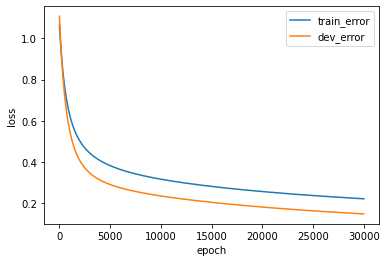

In [509]:
train_model(train_dataset=train_dataset_torch,
            dev_dataset=dev_dataset_torch,
            model=logistic_model_sgd,
            defined_optimizer="sgd",
            loss_function=logistic_model_sgd.loss_function,
            epochs=epochs,
            lr=learning_rate,
            print_loss_values=False,
            print_loss_graph=True)

In [510]:
calculate_accuracy(model=logistic_model_sgd, data=dev_dataset_torch.X, labels=dev_dataset_torch.y)

96.66666666666667

## ----------------

Create a copy of the data to explore Feature Engineering:

In [160]:
X_train_expended = X_train.copy()

X_train_expended["s_l sqrt"] = np.sqrt(X_train_expended["sepal length (cm)"])
X_train_expended["s_w sqrt"] = np.sqrt(X_train_expended["sepal width (cm)"])
X_train_expended["p_l sqrt"] = np.sqrt(X_train_expended["petal length (cm)"])
X_train_expended["p_w sqrt"] = np.sqrt(X_train_expended["petal width (cm)"])
X_train_expended.head()
X_train_expended.corr().style.applymap(color_corr_matrix)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),s_l sqrt,s_w sqrt,p_l sqrt,p_w sqrt
sepal length (cm),1.000000,-0.034054,0.860946,0.789994,0.999249,-0.025113,0.840202,0.786181
sepal width (cm),-0.034054,1.000000,-0.341662,-0.279155,-0.040292,0.998873,-0.383780,-0.357493
petal length (cm),0.860946,-0.341662,1.000000,0.958200,0.866129,-0.329486,0.996443,0.967688
petal width (cm),0.789994,-0.279155,0.958200,1.000000,0.796552,-0.266131,0.953710,0.988451
s_l sqrt,0.999249,-0.040292,0.866129,0.796552,1.000000,-0.031648,0.847446,0.794939
s_w sqrt,-0.025113,0.998873,-0.329486,-0.266131,-0.031648,1.000000,-0.372087,-0.345759
p_l sqrt,0.840202,-0.383780,0.996443,0.953710,0.847446,-0.372087,1.000000,0.972595
p_w sqrt,0.786181,-0.357493,0.967688,0.988451,0.794939,-0.345759,0.972595,1.000000


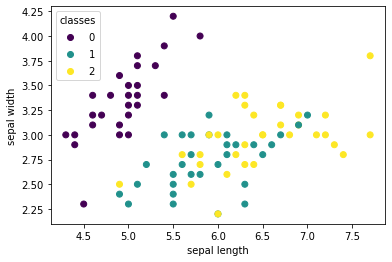

In [162]:
plot_scatter_iris(X_train_expended["sepal length (cm)"], X_train_expended["sepal width (cm)"], y_train["Class"], "sepal length", "sepal width")

## ------------------